In [1]:
### 파이썬 라이버리
os.listdir()
os.getcwd() : 현재 작업 디렉터리 확인
시각화 : matplotlib, seaborn, folium, plotly
데이터 처리 : pandas
    
선형대수, 난수, 수학함수, 딥러닝 : numpy
머신러닝 Scikit-learn : sklearn
SciPy
###

SyntaxError: invalid syntax (<ipython-input-1-7effb626d5d1>, line 3)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import pandas as pd

train = pd.read_csv("house_train.csv")
test = pd.read_csv("house_test.csv")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6555 non-null   int64  
 1   date           6555 non-null   object 
 2   bedrooms       6555 non-null   int64  
 3   bathrooms      6555 non-null   float64
 4   sqft_living    6555 non-null   int64  
 5   sqft_lot       6555 non-null   int64  
 6   floors         6555 non-null   float64
 7   waterfront     6555 non-null   int64  
 8   view           6555 non-null   int64  
 9   condition      6555 non-null   int64  
 10  grade          6555 non-null   int64  
 11  sqft_above     6555 non-null   int64  
 12  sqft_basement  6555 non-null   int64  
 13  yr_built       6555 non-null   int64  
 14  yr_renovated   6555 non-null   int64  
 15  zipcode        6555 non-null   int64  
 16  lat            6555 non-null   float64
 17  long           6555 non-null   float64
 18  sqft_liv

In [10]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15208,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1,15209,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
2,15210,20150124T000000,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
3,15211,20141205T000000,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
4,15212,20140514T000000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980


In [13]:
print(train['bedrooms'].unique(), test['bedrooms'].unique()) 

[ 3  2  5  4  6  1  7  9  8  0 10] [4 3 2 5 6 1 0 7 8 9]


In [14]:
print( train['bedrooms'].unique(), test['bedrooms'].unique(),
      end='\n\n' )
print( train['bathrooms'].unique(), test['bathrooms'].unique(),
      end='\n\n' )
print("집의 층수 : \n", train['floors'].unique(), test['floors'].unique(),
      end='\n\n' )
print("집의 전방에 강이 흐르는지 유무 : \n", 
      train['waterfront'].unique(), test['waterfront'].unique(), end='\n\n' )

[ 3  2  5  4  6  1  7  9  8  0 10] [4 3 2 5 6 1 0 7 8 9]

[1.   2.   2.25 1.5  2.5  1.75 3.   2.75 3.25 4.   3.5  0.75 4.75 5.
 4.25 4.5  3.75 5.25 6.   1.25 0.5  5.5  6.75 5.75 0.   8.   7.5  7.75
 6.25] [4.5  2.5  3.   1.   1.75 2.   2.25 3.25 4.   1.5  3.5  2.75 0.75 5.
 4.25 0.   1.25 3.75 4.75 5.5  5.25 6.   0.5  6.5 ]

집의 층수 : 
 [1.  2.  1.5 3.  2.5 3.5] [1.  2.  1.5 3.  2.5 3.5]

집의 전방에 강이 흐르는지 유무 : 
 [0 1] [0 1]



In [15]:
print("침실의 수 : \n",
      train['bedrooms'].unique(), test['bedrooms'].unique(), end='\n\n' )
print("화장실의 수 : \n",
      train['bathrooms'].unique(), test['bathrooms'].unique(), end='\n\n' )
print("집의 층수 : \n", train['floors'].unique(), test['floors'].unique(),
      end='\n\n' )
print("집의 전방에 강이 흐르는지 유무 : \n", 
      train['waterfront'].unique(), test['waterfront'].unique(), end='\n\n' )
print("집이 얼마나 좋아 보이는지의 정도 : \n", 
      train['view'].unique(), test['view'].unique(), end='\n\n' )
print("집의 전반적인 상태 : \n", 
      train['condition'].unique(), test['condition'].unique(), end='\n\n' )
print("King County grading 시스템 기준으로 매긴 집의 등급 : \n", 
      train['grade'].unique(), test['grade'].unique(), end='\n\n' )
print("위도 범위 : \n", 
      train['lat'].min(), train['lat'].max(), end='\n\n' )
print("위도 범위 : \n", 
      test['lat'].min(), test['lat'].max(), end='\n\n' )

print("경도 범위 : \n", 
      train['long'].min(), train['long'].max(), end='\n\n' )
print("경도 범위 : \n", 
      test['long'].min(), test['long'].max(), end='\n\n' )

침실의 수 : 
 [ 3  2  5  4  6  1  7  9  8  0 10] [4 3 2 5 6 1 0 7 8 9]

화장실의 수 : 
 [1.   2.   2.25 1.5  2.5  1.75 3.   2.75 3.25 4.   3.5  0.75 4.75 5.
 4.25 4.5  3.75 5.25 6.   1.25 0.5  5.5  6.75 5.75 0.   8.   7.5  7.75
 6.25] [4.5  2.5  3.   1.   1.75 2.   2.25 3.25 4.   1.5  3.5  2.75 0.75 5.
 4.25 0.   1.25 3.75 4.75 5.5  5.25 6.   0.5  6.5 ]

집의 층수 : 
 [1.  2.  1.5 3.  2.5 3.5] [1.  2.  1.5 3.  2.5 3.5]

집의 전방에 강이 흐르는지 유무 : 
 [0 1] [0 1]

집이 얼마나 좋아 보이는지의 정도 : 
 [0 3 4 2 1] [0 3 2 4 1]

집의 전반적인 상태 : 
 [3 4 5 2 1] [3 4 2 5 1]

King County grading 시스템 기준으로 매긴 집의 등급 : 
 [ 7  6  8  9 10 11 12  5  4  3 13  1] [11  7  9  8  6 10  5  4 12 13  1]

위도 범위 : 
 47.1559 47.7776

위도 범위 : 
 47.1593 47.7776

경도 범위 : 
 -122.519 -121.315

경도 범위 : 
 -122.515 -121.315



In [21]:
sel = ['condition', 'lat','long','floors']
X = train[sel]
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)


In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
knn = KNeighborsRegressor (n_neighbors = 3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(knn.score(X_test, y_test)) # 결정계수

0.4684087750088025


In [24]:
dat = {"오차" : y_test - pred}

In [25]:
dat =pd.DataFrame(dat)

In [27]:
dat["절대값"] = abs(dat["오차"])

In [28]:
dat['오차제곱'] = dat['오차']**2

In [30]:
np.sqrt(np.mean(dat['오차제곱']))

256757.37645537072

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(lr.score(X_test, y_test)) # 결정계수

0.185612609706711


In [32]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(rf.score(X_test, y_test)) # 결정계수

0.6032856005990307


In [33]:
mse_val =  ( (pred - y_test) ** 2 ).sum() / len(pred)
print( mse_val )  # mse
print( mse_val ** 0.5 )   # rmse

49197838171.77042
221805.8569374813


In [34]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print("[cancer.keys()]  \n{}".format(cancer.keys()))
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

[cancer.keys()]  
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태 : (569, 30)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=77)

In [37]:
import numpy as np
# np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)

print("변환전 후 크기 : {}".format(X_train.shape))
print("변환전 최대, 최소 : \n {}, {}".format(X_train.max(axis=0), 
                                      X_train.min(axis=0)))
print()
print("변환된 후 크기 : {}".format(X_train_s.shape))
print("변환후 최대, 최소 : \n {}, {}".format(X_train_s.max(axis=0), 
                                      X_train_s.min(axis=0)))

변환전 후 크기 : (426, 30)
변환전 최대, 최소 : 
 [28.110 39.280 188.500 2499.000 0.145 0.345 0.427 0.201 0.304 0.096 2.873
 4.885 21.980 525.600 0.031 0.106 0.396 0.053 0.079 0.030 33.120 47.160
 220.800 3432.000 0.223 1.058 1.252 0.291 0.577 0.207], [7.691 10.380 47.920 170.400 0.053 0.019 0.000 0.000 0.106 0.050 0.117
 0.360 0.771 7.254 0.002 0.002 0.000 0.000 0.008 0.001 8.678 12.490 54.490
 223.600 0.071 0.027 0.000 0.000 0.157 0.055]

변환된 후 크기 : (426, 30)
변환후 최대, 최소 : 
 [1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000], [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000]


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

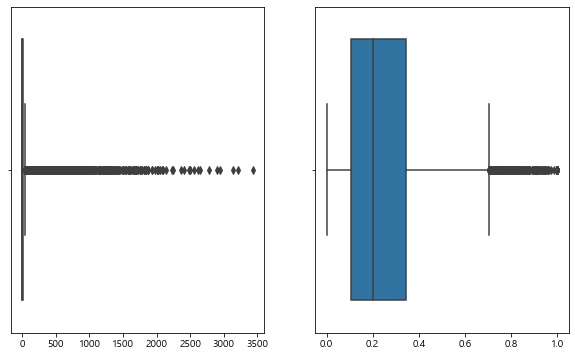

In [40]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.subplot(1,2,2)
sns.boxplot(X_train_s)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 같은 내용 다른 방법
X_train_scaler = scaler.fit(X_train).transform(X_train)
X_train_scaler_d = scaler.fit_transform(X_train)

### fit().transform()과 fit_transform()과 같다.
print("변경전 :", X_train.max(), X_train.min() )
print("변경후 :", X_train_scaler.max(), X_train_scaler.min() )
print("변경후 :", X_train_scaler_d.max(), X_train_scaler_d.min() )

변경전 : 3432.0 0.0
변경후 : 11.587694680416146 -3.0966340529458245
변경후 : 11.587694680416146 -3.0966340529458245


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

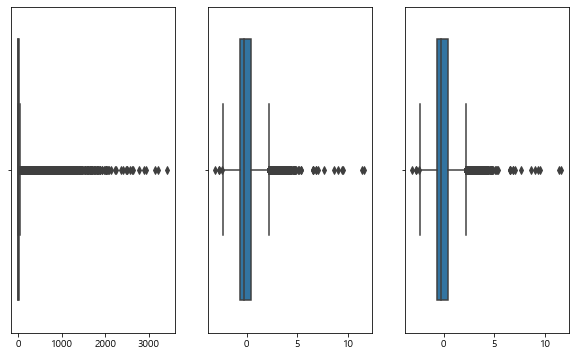

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(10,6))
sns.boxplot(X_train, ax=axes[0])
sns.boxplot(X_train_scaler, ax=axes[1])
sns.boxplot(X_train_scaler_d, ax=axes[2])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

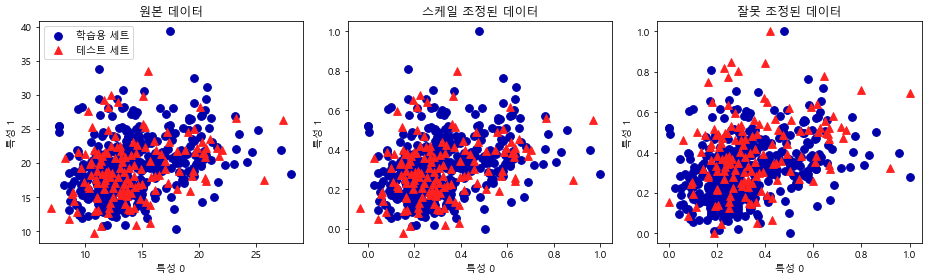

In [45]:
import mglearn
# 학습용 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="학습용 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="학습용 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

In [46]:
### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

### 마이너스 설정
from matplotlib import rc
matplotlib.rc("axes", unicode_minus=False)

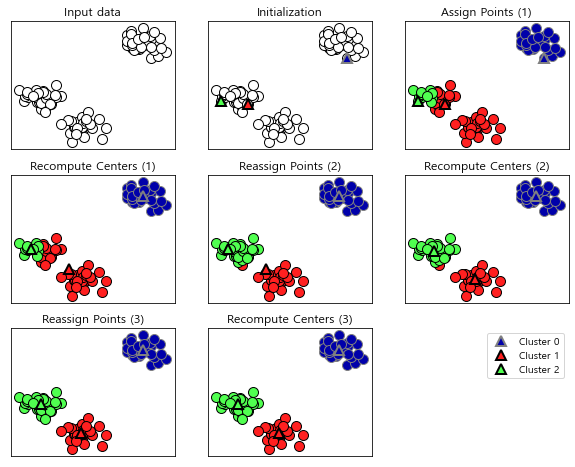

In [47]:
import mglearn 
%matplotlib inline

mglearn.plots.plot_kmeans_algorithm()

In [48]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

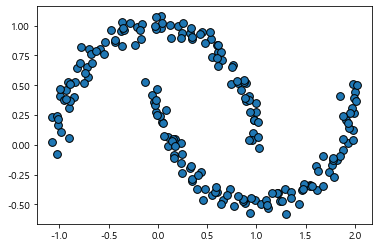

In [49]:
import matplotlib.pyplot as plt

feature1 = X[ : , 0]
feature2 = X[ : , 1]

plt.scatter(feature1, feature2,
            cmap=mglearn.cm2, 
            s=60,
            edgecolors='k')

In [50]:
## 그래프 위에 클러스터의 중심 표시
center1 = kmeans.cluster_centers_[0]
center2 = kmeans.cluster_centers_[1]

plt.scatter(feature1, feature2, c=y_pred)
plt.scatter(-0.200, 0.580, marker="^")
plt.scatter(1.207, -0.083, marker="v")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

NameError: name 'kmeans' is not defined

In [51]:
# 무작위로 데이터 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경한다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:,0],
                         X[:,1],
                         kmeans.labels_,
                         markers='o')

mglearn.discrete_scatter(
   kmeans.cluster_centers_[:,0],
   kmeans.cluster_centers_[:,1], 
   [0,1,2],
   markers="^",
   markeredgewidth=2)

plt.xlabel('특성 0')
plt.ylabel('특성 1')

NameError: name 'make_blobs' is not defined

In [52]:
import mglearn
import matplotlib.pyplot as plt

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

### 마이너스 설정
from matplotlib import rc
matplotlib.rc("axes", unicode_minus=False)

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


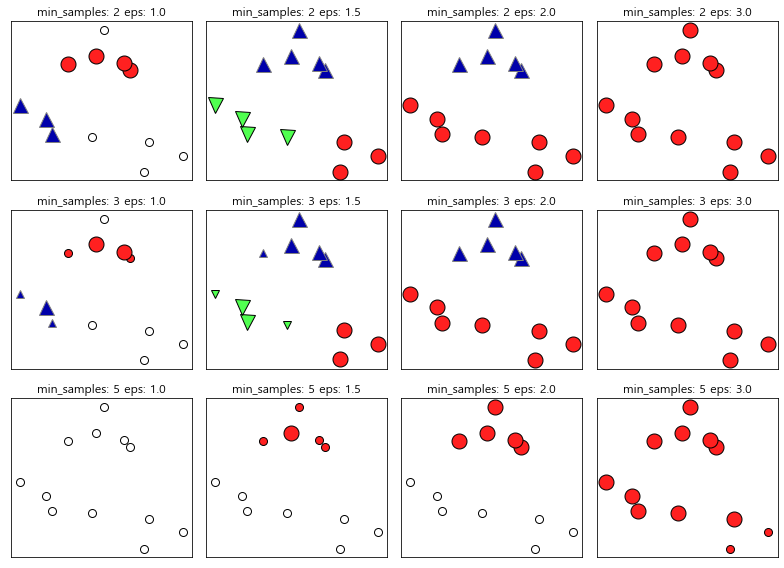

In [53]:
mglearn.plots.plot_dbscan()

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
X, y = 

SyntaxError: invalid syntax (<ipython-input-57-7525fe3e565b>, line 1)

NameError: name 'X_scaled' is not defined

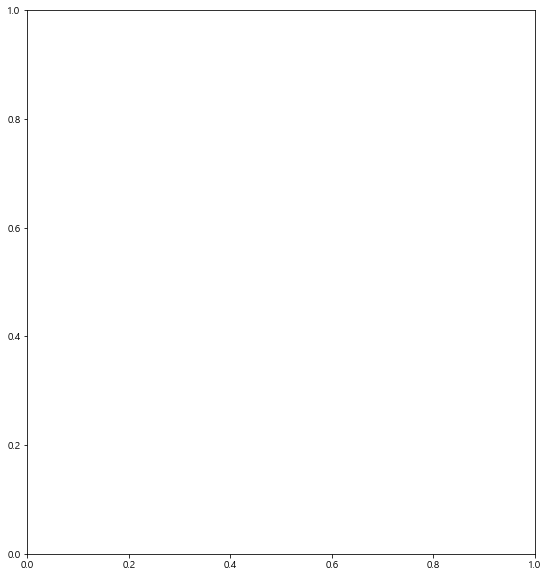

In [58]:
# 원래 데이터 그래프
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)   # 2행 1열에 첫번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2)  # 원본 샘플 데이터 
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# DBSCAN 적용한 그래프
plt.subplot(1,2,2)   # 2행 1열에 두번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2, c=clusters) # DBSCAN 적용한 샘플 데이터
plt.xlabel("특성 0")
plt.ylabel("특성 1")